### General instructions

Complete the exercises listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells.

In [1]:
import autograd.numpy as np
from autograd import grad
from matplotlib import gridspec
import matplotlib.pyplot as plt

In [2]:
def gradient_descent(func, alpha, max_its, w):
    gradient = grad(func)
    weight_history = []
    for k in range(max_its):
        grad_eval = gradient(w)
        w = w - alpha * grad_eval
        weight_history.append(w)
    return weight_history

#### <span style="color:#a50e3e;">Exercise 1. </span>   Perform two-class classification on a toy dataset

Code up the two-class logistic regression / softmax cost function, using gradient descent to minimize.  You should use the two class toy dataset we [we saw in class](https://jermwatt.github.io/mlrefined/presentations/courses/deep_learning/Lecture_3_logistic_regression.slides.html#/14/1) to test out your code.  This dataset is in the file called *3d_classification_data_v2.csv*.

Create a plot with two panels that shows the number of misclassifications at each gradient descent step (in the left panel), and one that compares the cost function at each gradient descent step (in the right panel).  You won't get perfect separation - but you should be able to separate most of the points.

In [3]:
data_1 = np.loadtxt('3d_classification_data_v2.csv', delimiter=',') # load the data
x = data_1[:, :-1]
y = data_1[:, -1]
y.shape = (len(y), 1)

In [4]:
# avoid overflow
#def my_exp(x, G=500):
    #return np.exp(x) if x<G else np.exp(G)

# define softmax cost
def softmax(w):
    cost = 0
    for p in range(0, len(y)):
        ap = w[0] + np.dot(x[p].T, w[1:])
        #ap = w[0] + sum([a*b for a, b in zip(w[1:], x[p])])
        cost += np.log(1 + np.exp(-y[p] * ap))
    return cost

# define counting cost
def counting_cost(w):
    cost = 0
    for p in range(0, len(y)):
        ap = w[0] + np.dot(x[p].T, w[1:])
        #ap = w[0] + sum([a*b for a, b in zip(w[1:], x[p])])
        cost += (np.sign(ap)-y[p])**2
    return 0.25*cost

In [5]:
w_init = np.random.randn(3,1) # initial point at random, 3 by 1 
weight_hist = gradient_descent(func=softmax, alpha=0.05, max_its=100, w=w_init)

In [6]:
count_evals = [] # list of misclassification number 
cost_evals = [] # list of softmax cost history 
for k in range(len(weight_hist)):
    w = weight_hist[k]
    count_evals.append(counting_cost(w)) # add each misclassification number history
    cost_evals.append(softmax(w)) # add each softmax cost history

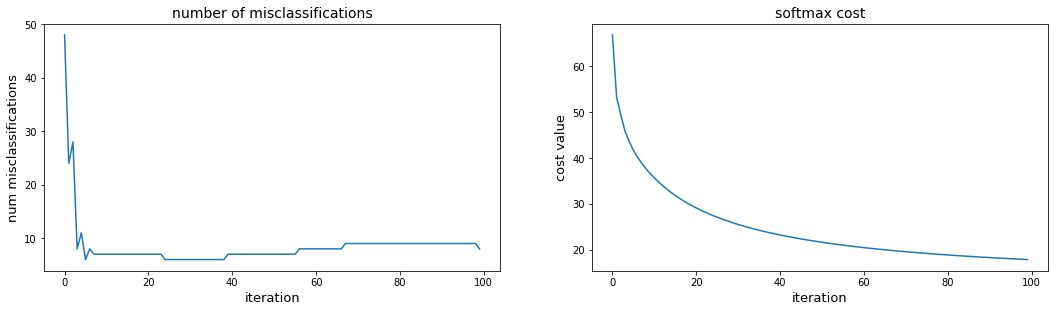

In [7]:
# create subplots
fig = plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.plot(np.arange(0, len(weight_hist)), count_evals[:len(weight_hist)])
ax1.set_xlabel('iteration', fontsize = 13)
ax1.set_ylabel('num misclassifications', rotation = 90, fontsize = 13)
ax1.set_title('number of misclassifications', fontsize = 14)

ax2.set_xlabel('iteration', fontsize = 13)
ax2.set_ylabel('cost value', rotation = 90, fontsize = 13)
ax2.set_title('softmax cost', fontsize = 14)
ax2.plot(np.arange(0, len(weight_hist)), cost_evals[:len(weight_hist)])

plt.show()

#### <span style="color:#a50e3e;">Exercise 2. </span>   Perform two-class classification on a breast cancer dataset

Use the softmax cost function to classify healthy from cancerous tissue using the dataset located in breast_cancer_dataset.csv (included in this homework folder).  You can examine the description of this dataset [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). 

There are $N = 8$ input dimensions to the input of this dataset (these are the first $N = 8$ columns of the breast_cancer_dataset.csv, the last column are the associated labels).  Fit using gradient descent using a maximum of 5,000 iterations.  You should be able to reach a point on the surface where you misclassify less than 30 examples.

**Note:** Python is a great prototyping language but [it is slow](http://jakevdp.github.io/blog/2014/05/09/why-python-is-slow/), particular when evaluating explicit for loops.  If you are having speed issues try re-writing the softmax cost function using as few explicit for-loops as possible (you can indeed write the entire summation in a single line of Python code, for-loop free).

In [8]:
data_2 = np.loadtxt('breast_cancer_data.csv', delimiter=',') # load the data
x = data_2[:, :-1]
y = data_2[:, -1]
y.shape = (len(y), 1)

In [9]:
w_init = np.random.randn(9,1) # initial point at random, 9 by 1 
weight_hist = gradient_descent(func=softmax, alpha=10**-4, max_its=2000, w=w_init)

In [10]:
count_evals = [] # list of misclassification number 
cost_evals = [] # list of softmax cost history 
for k in range(len(weight_hist)):
    w = weight_hist[k]
    count_evals.append(counting_cost(w)) # add each misclassification number history
    cost_evals.append(softmax(w)) # add each softmax cost history

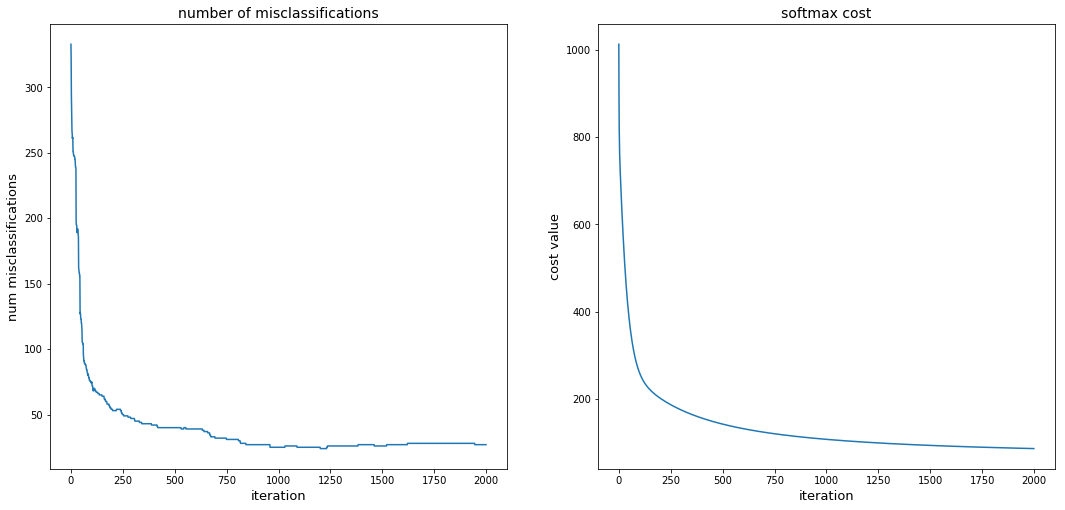

In [11]:
# create subplots
fig = plt.figure(figsize=(18, 18))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
 
ax1.plot(np.arange(0, len(weight_hist)), count_evals[:len(weight_hist)])
ax1.set_xlabel('iteration', fontsize = 13)
ax1.set_ylabel('num misclassifications', rotation = 90, fontsize = 13)
ax1.set_title('number of misclassifications', fontsize = 14)

ax2.set_xlabel('iteration', fontsize = 13)
ax2.set_ylabel('cost value', rotation = 90, fontsize = 13)
ax2.set_title('softmax cost', fontsize = 14)
ax2.plot(np.arange(0, len(weight_hist)), cost_evals[:len(weight_hist)])

plt.show()

#### <span style="color:#a50e3e;">Exercise 3. </span>   Code up One-versus-All multiclass classification

Using the toy $C = 3$ class dataset we saw [in class](https://jermwatt.github.io/mlrefined/presentations/courses/deep_learning/Lecture_5_one_versus_all.slides.html#/) - located in *3class_data.csv* - code up One-Versus-All classification, using this toy dataset to test out your code.  You should be able to learn a model that perfectly separates this data - as shown in class.  You may use your softmax cost / gradient descent code here for each of the two-class subproblems! 

In [12]:
data_3 = np.loadtxt('3class_data.csv', delimiter=',') # load the data
x = data_3[:, :-1]
y = data_3[:, -1]
y.shape = (len(y), 1)

In [13]:
# counting cost for multi-class
def softmax(w):
    cost = 0
    for p in range(0, len(y_temp)): # y_temp is the list of temporary labels from when we do OvA classification
        ap = w[0] + np.dot(x[p].T, w[1:])
        #ap = w[0] + sum([a*b for a, b in zip(w[1:], x[p])])
        cost += np.log(1 + np.exp(-y_temp[p] * ap))
    return cost

In [14]:
# perform OvA multi-class classification 
num_classes = np.size(np.unique(y))
idx = 0
w_init = np.random.randn(3, 1)
W = []
for c in np.unique(y):
    y_temp = [] # list of temporary labels 
    for i in range(len(y)):
        if y[i] == c:
            y_temp.append(1.0) # if yp = c, labels = 1
        if y[i] != c:
            y_temp.append(-1.0) # if yp != c, labels = -1        
            
    w_hist = gradient_descent(func=softmax, alpha=0.1, max_its=50, w=w_init)
    
    # find the best weights for each classifier
    g_count = []
    for j in range(len(w_hist)):
        w = w_hist[j]
        g_count.append(softmax(w))
    idx = np.argmin(g_count)
    w = w_hist[idx]
    
    # normalize the weights of each classifier by length of the normal vector
    w_norm = np.dot(w[1:].T, w[1:])**(0.5)
    w_temp = [v/w_norm for v in w]
    W.append(w_temp)

W = np.asarray(W)
W.shape = (3, 3)

In [15]:
# applying fusion rule
idx_list = [] # index of predicted y 
for nn in range(0, len(y)): # number of y values is 30
    temp_list = []
    for c in range(0, num_classes): # number of classes is 3
        pt = W[c][0] + np.dot(x[nn].T, W[c][1:])
        temp_list.append(pt)
    idx_list.append(np.argmax(temp_list)+1)

print(idx_list)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


##### From the above index of classification, we can see the predicted y is exactly the same as all original y values 

In [21]:
# compute misclassification number
num_misclass = 0
for p in range(0, len(idx_list)):
    num_misclass += np.sign(idx_list[p] - data_3[:, -1][p])
print('The number of misclassification is: ' + str(num_misclass))

The number of misclassification is: 0.0


#### <span style="color:#a50e3e;">Exercise 4. </span>   A nonlinear two-class dataset

Propose a nonlinear feature transformation and integrate it into your two-class classification scheme in order to adequately classify the dataset shown below - located in the file *bricks.csv'.  With the right transformation you should be able to classify this quite well.

<p>
  <img src= 'brick_pick.png' width="40%" height="40%" alt=""/>
</p>

In [17]:
data_4 = np.loadtxt('bricks.csv', delimiter=',') # load the data
x = data_4[:, :-1]
y = data_4[:, -1]
y.shape = (len(y), 1)

In [22]:
# define the decision boundary / predictor
def f1(x, w):
    return w[1]*x[0]

def f2(x, w):
    return w[2]*np.sin(w[3]+w[4]*x[1])

def predict(x, w):
    # prediction = w[0] * np.sin(w[1]*x[0] + w[2]*x[1])
    #prediction = w[0] * np.sin(w[1] * x[0]) * np.sin(w[2] * x[1])
    prediction = w[0]+ f1(x, w) + f2(x, w)
    return prediction

# define softmax cost
lam = 10**(-3)
def softmargin_svm(w):
    cost = 0
    for p in range (0, len(y)):
        cost += np.log(1 + np.exp(-y[p]*predict(x[p, :], w))) + lam*np.dot(w[1:].T, w[1:])
    return cost

In [24]:
# tune the prediction
w_init = np.asarray([-1.0, -1.0, 0.0, 0.0, 1.0])
weight_hist = gradient_descent(func=softmargin_svm, alpha=0.1, max_its=500, w=w_init)

In [25]:
# find the best weight
g_count = []
for j in range(len(weight_hist)):
    w = weight_hist[j]
    g_count.append(softmargin_svm(w)) 
idx = np.argmin(g_count) # with best weights, softmax cost should be the minimum
best_w = weight_hist[idx] 

In [26]:
# generate predicted y
pred_y = []
for num in range(0, len(y)):
    # assuming predicted y = sign ( predictior ) 
    py = np.sign(predict(x[num, :], best_w))
    pred_y.append(py)

# reshape the list of predicted y
pred_y = np.asarray(pred_y)
pred_y.shape = (len(y), 1)

In [27]:
# get softmax cost history
cost_evals = []
for k in range(len(weight_hist)):
    w = weight_hist[k]
    cost_evals.append(softmargin_svm(w))

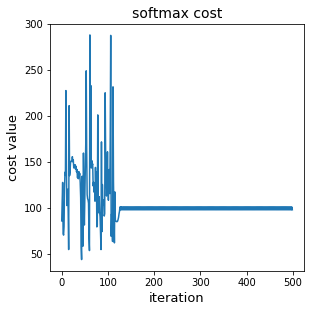

In [28]:
# get softmax cost history
cost_evals = []
for k in range(len(weight_hist)):
    w = weight_hist[k]
    cost_evals.append(softmargin_svm(w))

In [29]:
# now we compute the number of misclassification
number_misclass = 0
for p in range(0, len(y)):
    number_misclass += np.absolute(np.sign(pred_y[p] - y[p]))
print('The number of misclassification is: ' + str(number_misclass[0]))

The number of misclassification is: 2.0
